# Information Dynamics examples

In [144]:
#Imports
from frites.simulations import StimSpecAR
import matplotlib.pyplot as plt
from conn_pid import conn_pid 
from frites import set_mpl_style
from frites.conn import conn_te
from conn_ii import conn_ii

### Step 0. Simulate two time series using auto-regressive model (AR) with causal coupling from X to Y

We use the class :class:`frites.simulations.StimSpecAR` to simulate an
stimulus-specific autoregressive model.

See https://brainets.github.io/frites/api/generated/frites.simulations.StimSpecAR.html#examples-using-frites-simulations-stimspecar

Evoked HGA AR model (n_times=200, n_epochs=500, n_stim=2, random_state=5604)


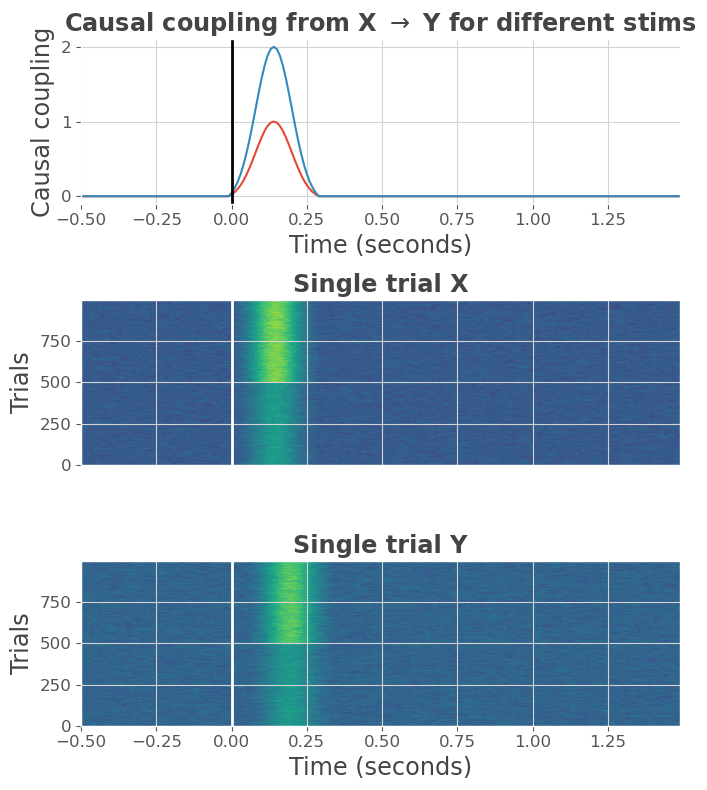

In [145]:
# Parameters
ar_type = 'hga' # high-gamma activity
sf = 100
n_times = 200
n_epochs = 500
dt = 30
n_stim = 2
n_std = 3 
stim_onset = 50

# Simulation AR 
ss = StimSpecAR()
ar = ss.fit(ar_type=ar_type, n_times=n_times, stim_onset=stim_onset, dt=dt, n_epochs=n_epochs, n_stim=n_stim, sf=sf, n_std=n_std)

# Plot single-trial time series with stimulus dependency
plt.figure(figsize=(7, 8))
ss.plot(cmap='viridis')
plt.tight_layout()
plt.show()

### Step 1. Information storage

Several examples about information storage here with exemplar code and Jupyter Notebook:
https://brainets.github.io/frites/auto_examples/mi/index.html

### Step 2. Compute Interaction Information between two neural variables and stimulus

Redundancy-dominated is positive II, whereas synergy-dominated interactions are negative values of II

This code can be used to compute th stimulus-specific active storage is given by: 

II = MI[R(t); R(t-τ)] - MI[R(t); R(t-τ) | Spos]

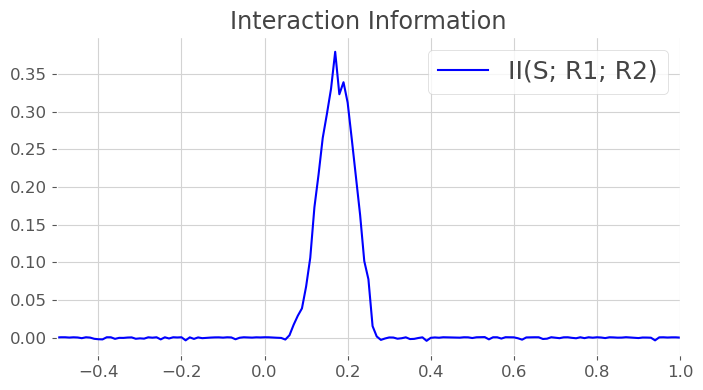

In [146]:
# Compute Interaction Information 
mi_node, interinfo = conn_ii(
    ar, 'trials', roi='roi', times='times', mi_type='cd', dt=1,
    verbose=False)

# Plotting
plt.figure(figsize=(7, 4))

times = interinfo['times'].data

plt.plot(times, -interinfo.squeeze(), color='blue', linestyle='-',
            label='II(S; R1; R2)')
plt.legend()  
plt.title('Interaction Information')
plt.tight_layout()
plt.xlim(-0.5, 1.)
plt.show()

### Step 3. Compute PID on HGA co-modulations across trials

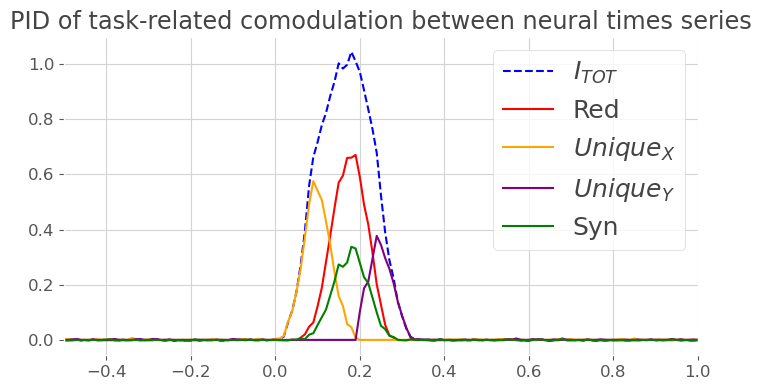

In [147]:
# Compute PID on HGA
mi_node, unique, infotot, redundancy, synergy = conn_pid(
    ar, 'trials', roi='roi', times='times', mi_type='cd', dt=1,
    verbose=False)

# Plotting
plt.figure(figsize=(7, 4))

times = unique['times'].data

plt.plot(times, infotot.squeeze(), color='blue', linestyle='--',
            label=r"$I_{TOT}$")
plt.plot(times, redundancy.squeeze(), color='red', label='Red')
plt.plot(times, unique.sel(roi='x').squeeze(), color='orange',
            label=r"$Unique_{X}$")
plt.plot(times, unique.sel(roi='y').squeeze(), color='purple',
            label=r"$Unique_{Y}$")
plt.plot(times, synergy.squeeze(), color='green', label="Syn")
plt.legend()

plt.title('PID of task-related comodulation between neural times series')

plt.tight_layout()
plt.xlim(-0.5, 1.)
plt.show()

### Step 4. Compute Transfer Entropy between neural signals


Defining links (n_roi=2; directed=True; net=False, nb_min_links=None)
Compute Transfer Entropy (n_pairs=2, delays=[1:1:10])


  0%|          | Estimating TE : 0/2 [00:00<?,       ?it/s]

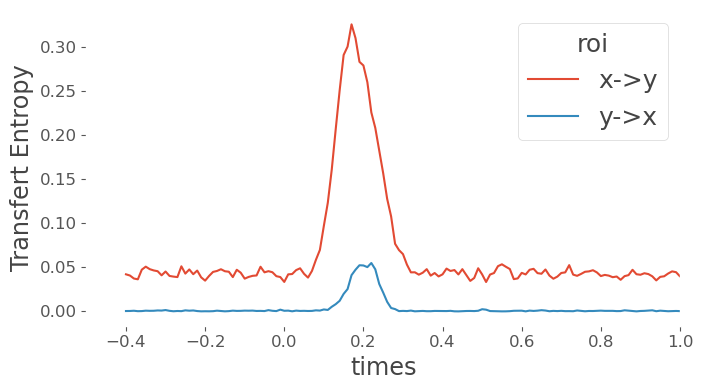

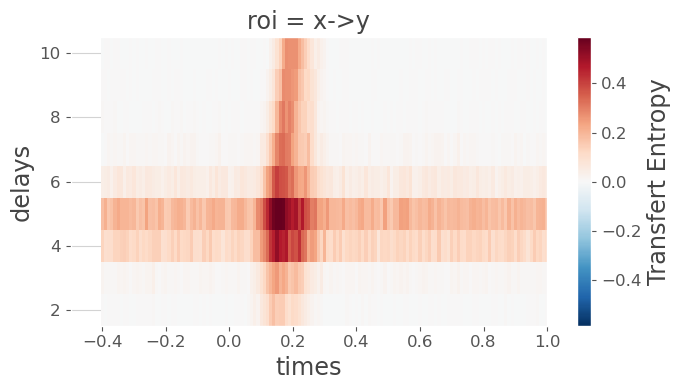

In [148]:
# Compute TE
te = conn_te(ar, times='times', roi='roi', max_delay=10,
                return_delays=True, step_delay=1, min_delay=1)

set_mpl_style()

# Plot TE in both directions
plt.figure(figsize=(7, 4))

# Delay averaged TE
te.mean('delays').plot(x='times', hue='roi')
plt.tight_layout()
plt.xlim(-0.5, 1.)
plt.grid()
plt.show()

# Delay-specific TE
plt.figure(figsize=(7, 4))
te.sel(roi='x->y').plot()
plt.tight_layout()
plt.xlim(-0.5, 1.)
plt.grid()
plt.show()

